# Week 9

## Working with matplot and seaborn

### Matplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

resultsdf = pd.read_csv('http://128.198.162.191/dataFiles/OLYMPICS/olympics_1896-2024.csv')

In [2]:
resultsdf.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,EventType,Medal
0,2024,Paris,Cycling Road,Men Individual Time Trial,Evenepoel Remco,Belgium,Male,Athlete,Gold
1,2024,Paris,Cycling Road,Men Individual Time Trial,Ganna Filippo,Italy,Male,Athlete,Silver
2,2024,Paris,Cycling Road,Men Individual Time Trial,Van Aert Wout,Belgium,Male,Athlete,Bronze
3,2024,Paris,Cycling Road,Women Individual Time Trial,Brown Grace,Australia,Female,Athlete,Gold
4,2024,Paris,Cycling Road,Women Individual Time Trial,Henderson Anna,Great Britain,Female,Athlete,Silver


In [3]:
resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24012 entries, 0 to 24011
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        24012 non-null  int64 
 1   City        24012 non-null  object
 2   Sport       24012 non-null  object
 3   Discipline  24012 non-null  object
 4   Athlete     20388 non-null  object
 5   Country     24012 non-null  object
 6   Gender      24012 non-null  object
 7   EventType   24012 non-null  object
 8   Medal       24012 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


#### Number of metals won by country

In [4]:
medalsCountry = resultsdf.groupby('Country')['Medal'].count().sort_values(ascending=False)

medalsCountry 

Country
United States of America    3424
Germany                     1280
Soviet Union                1272
Great Britain               1207
France                      1139
                            ... 
Sudan                          1
Turkmenistan                   1
Tonga                          1
Togo                           1
Virgin Islands, US             1
Name: Medal, Length: 162, dtype: int64

#### Visualize this data

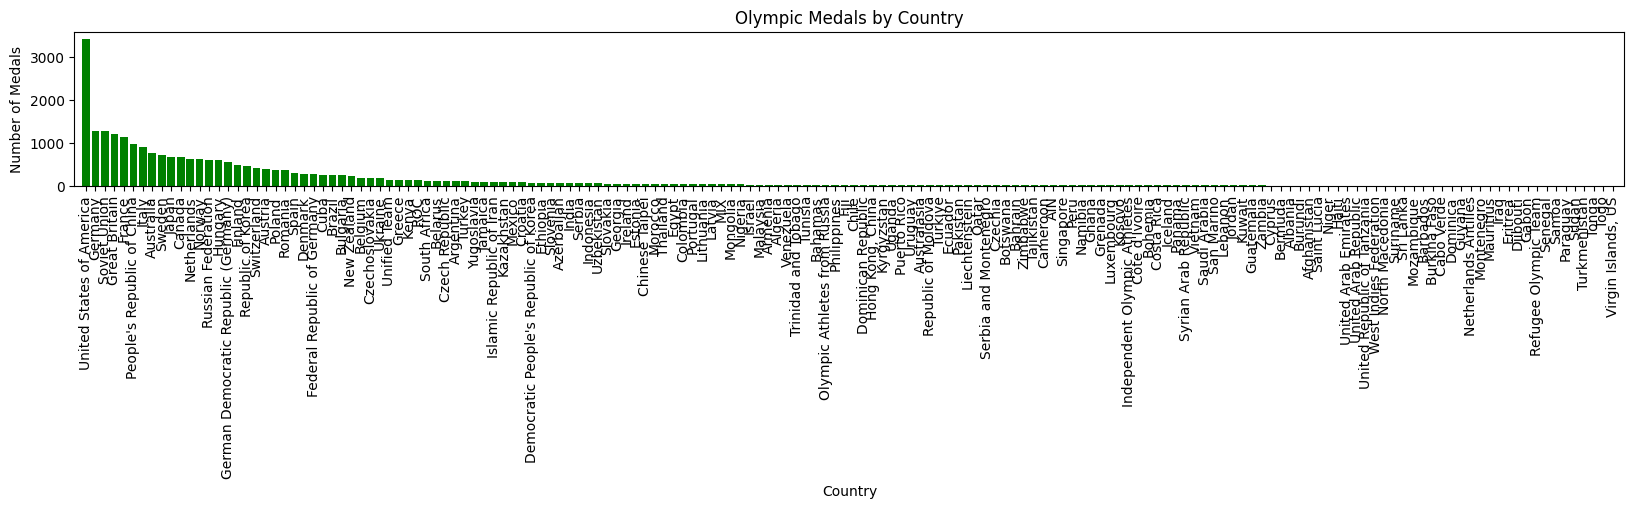

In [11]:
plt.figure(figsize=(20,2))                          # create the visualization

plt.bar(medalsCountry.index, medalsCountry.values, color='green')  # create the bar chart, choose x and y values

plt.title('Olympic Medals by Country')              # add a title
plt.xlabel('Country')                               # add x label
plt.ylabel('Number of Medals')                      # add y label
plt.xticks(rotation=90)                             # rotate x labels for better readability
plt.margins(x=0.005)                                # add margins to x axis

plt.show()                                          # display the visualization

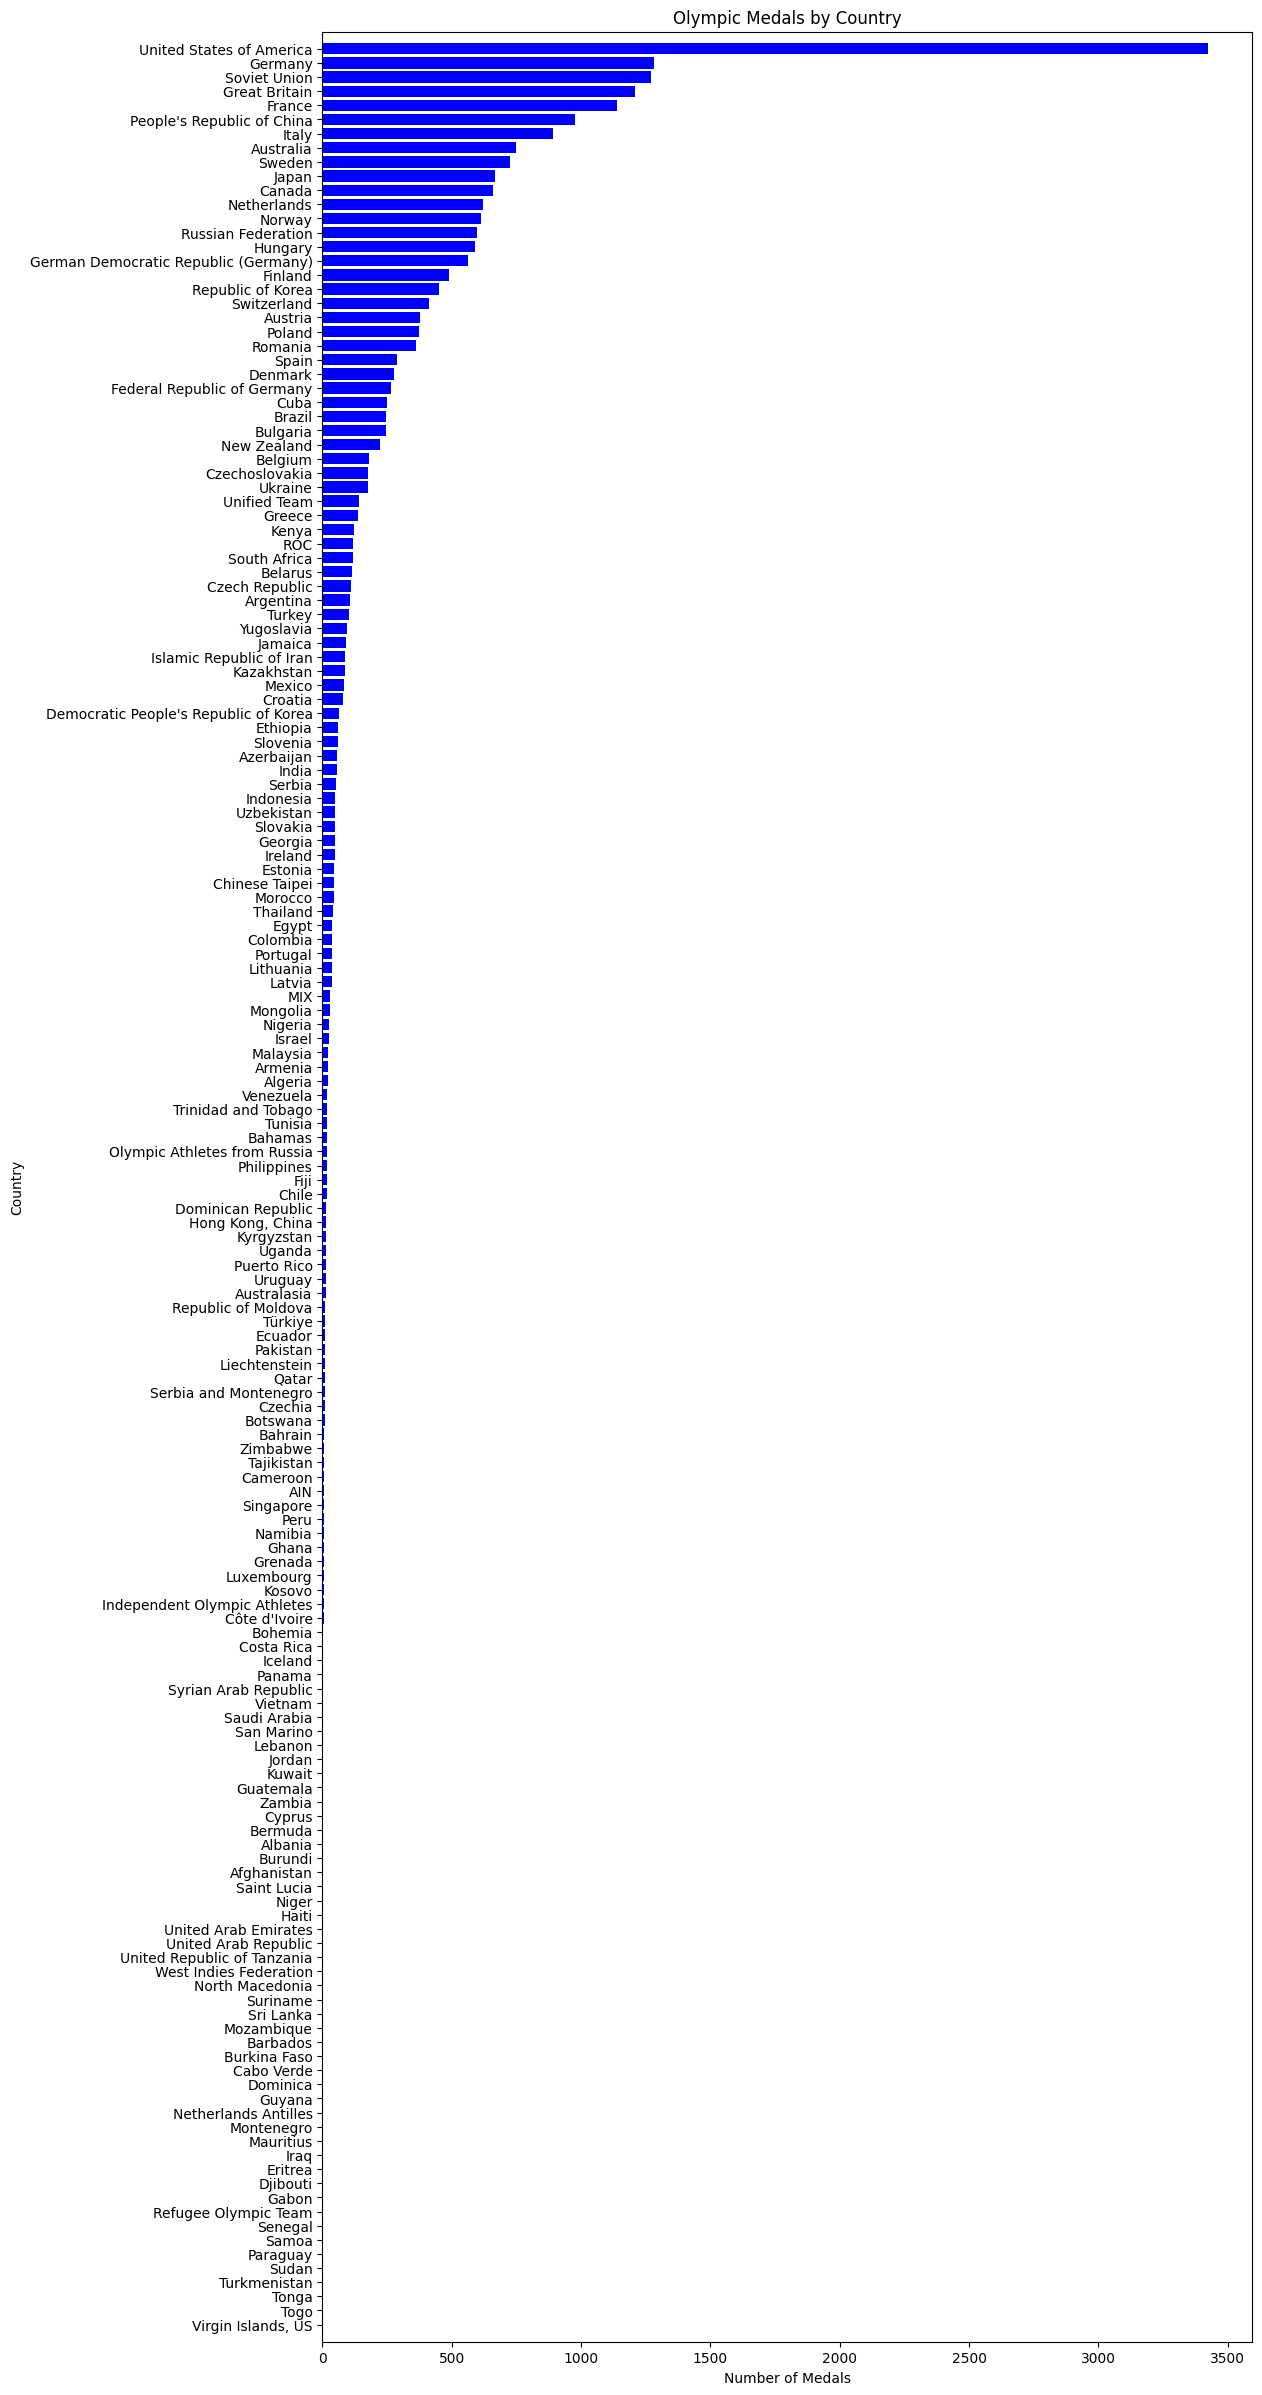

In [9]:
plt.figure(figsize=(12,30))                        # create the visualization

plt.barh(medalsCountry.index, medalsCountry.values, color='blue')  # create the horizontal bar chart, choose x and y values
plt.title('Olympic Medals by Country')              # add a title
plt.xlabel('Number of Medals')                      # add x label
plt.ylabel('Country')                               # add y label
plt.margins(y=0.005)                                # add margins to y axis

plt.gca().invert_yaxis()                            # invert y axis to have the country with most medals on top

plt.show()                                          # display the visualization


#### US Medals by Type

Text(0.5, 1.0, 'Percent of US Medals by Type')

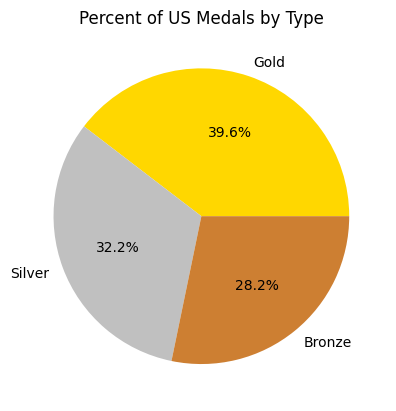

In [14]:
usResults = resultsdf[resultsdf['Country'] == 'United States of America']       # filter data for USA only

medalCounts = usResults['Medal'].value_counts()            # count number of each medal type

colors = ['#FFD700', '#C0C0C0', '#CD7F32']          # define colors for gold, silver, bronze

plt.pie(medalCounts.values, labels=medalCounts.index, autopct= '%1.1f%%', colors=colors)  # create pie chart with labels and percentage

plt.title("Percent of US Medals by Type")               # add title

#### Line Chart

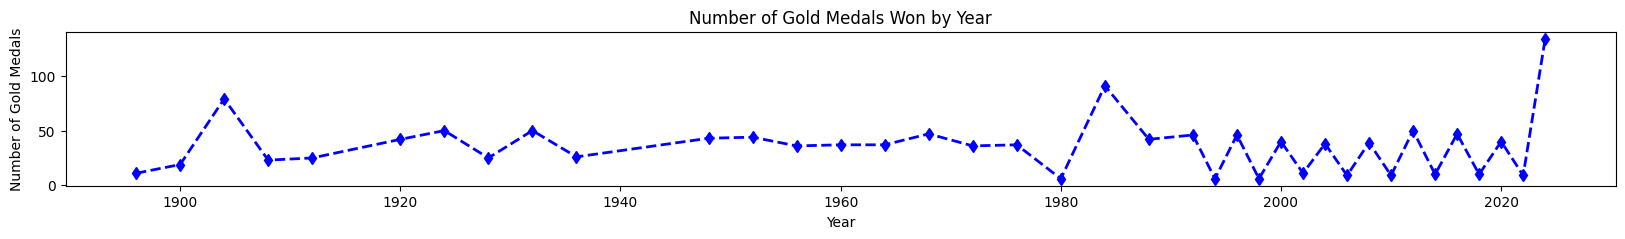

In [19]:
usGold = usResults[(usResults.Country == 'United States of America') & (usResults.Medal == 'Gold')]      # filter data for USA gold medals

usGoldYr = usGold.groupby('Year')['Medal'].count()        # count number of gold medals by year

plt.figure(figsize=(20, 2))                          # create the visualization

plt.plot(usGoldYr.index, usGoldYr.values, color = 'blue', linestyle = '--', marker = 'd', linewidth = 2, markersize = 6)  # create the line chart, choose x and y values and customize line style

plt.title('Number of Gold Medals Won by Year')  # add a title
plt.xlabel('Year')                               # add x label
plt.ylabel('Number of Gold Medals')              # add y label

plt.show()                                          # display the visualization

C:\Users\marja\AppData\Local\Temp\ipykernel_19376\368323917.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


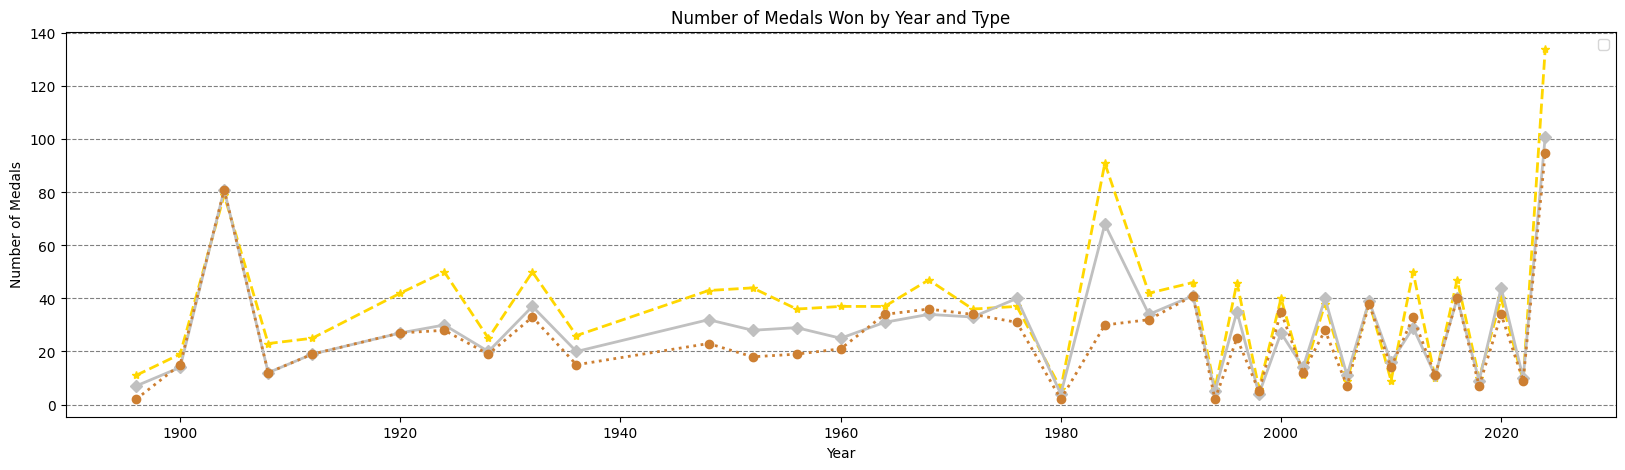

In [21]:
usGold = usResults[(usResults.Country == 'United States of America') & (usResults.Medal == 'Gold')]          # filter data for USA gold medals
usSilver = usResults[(usResults.Country == 'United States of America') & (usResults.Medal == 'Silver')]      # filter data for USA silver medals
usBronze = usResults[(usResults.Country == 'United States of America') & (usResults.Medal == 'Bronze')]      # filter data for USA bronze medals

usGoldYr = usGold.groupby('Year')['Medal'].count()            # count number of gold medals by year
usSilverYr = usSilver.groupby('Year')['Medal'].count()        # count number of silver medals by year
usBronzeYr = usBronze.groupby('Year')['Medal'].count()        # count number of bronze medals by year

plt.figure(figsize=(20, 5))                                   # create the visualization

plt.plot(usGoldYr.index, usGoldYr.values, color = '#FFD700', linestyle = '--', marker = '*', linewidth = 2, markersize = 6)       # create the line chart, choose x and y values and customize line style
plt.plot(usSilverYr.index, usSilverYr.values, color = '#C0C0C0', linestyle = '-', marker = 'D', linewidth = 2, markersize = 6)  # create the line chart, choose x and y values and customize line style
plt.plot(usBronzeYr.index, usBronzeYr.values, color = '#CD7F32', linestyle = ':', marker = 'o', linewidth = 2, markersize = 6)  # create the line chart, choose x and y values and customize line style

plt.title('Number of Medals Won by Year and Type')  # add a title
plt.xlabel('Year')                                  # add x label
plt.ylabel('Number of Medals')                      # add y label
plt.legend()
plt.grid(axis='y', linestyle='--', color = 'gray')                     # add grid lines for y axis

plt.show()                                          # display the visualization

### Seaborn

#### Scatter Plot

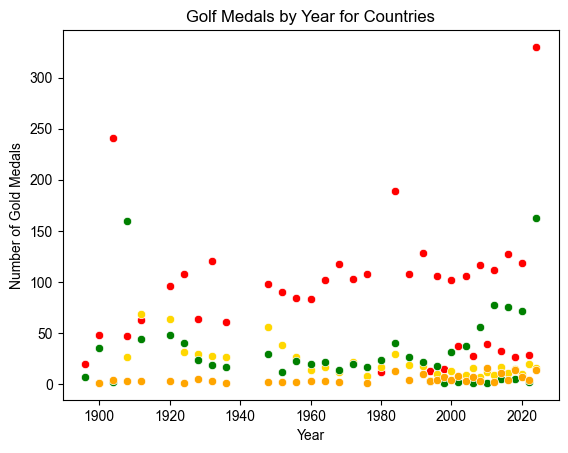

In [22]:
# Seaborn Visualization
# Filter data for gold medals won by selected countries
medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                        (resultsdf.Country == 'Sweden') |
                        (resultsdf.Country == 'Great Britain') |
                        (resultsdf.Country == 'Canada') &
                        (resultsdf.Medal == 'Gold')]

medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')      # group gold medals by year and country

medalsByYr = medalsGold.groupby('Year')['Country'].count()       # count number of gold medals by year

medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')        # pivot data for seaborn line plot

sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'United States of America'], x='Year', y='Gold Medals', color='red')  # create scatter plot for USA
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Sweden'], x='Year', y='Gold Medals', color='gold')                   # create scatter plot for Sweden
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Great Britain'], x='Year', y='Gold Medals', color='green')           # create scatter plot for Great Britain
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Canada'], x='Year', y='Gold Medals', color='orange')                 # create scatter plot for Canada

sns.set_style('darkgrid')       # set seaborn style

plt.title('Golf Medals by Year for Countries')  # add title
plt.xlabel('Year')                              # add x label
plt.ylabel('Number of Gold Medals')             # add y label

plt.show()                                      # display the visualization

#### Lineplot

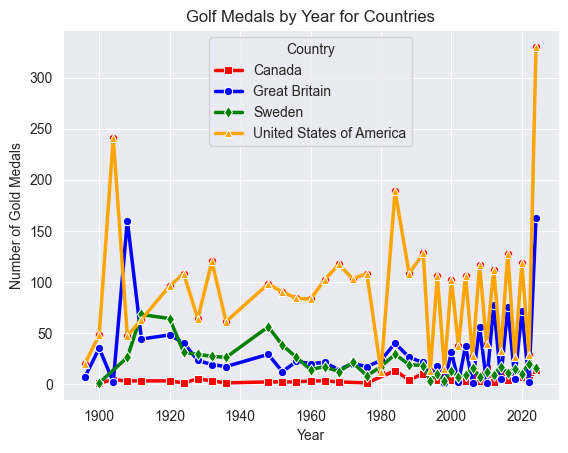

In [23]:
# Seaborn Visualization
# Filter data for gold medals won by selected countries
medalsGold = resultsdf[(resultsdf.Country == 'United States of America') |
                        (resultsdf.Country == 'Sweden') |
                        (resultsdf.Country == 'Great Britain') |
                        (resultsdf.Country == 'Canada') &
                        (resultsdf.Medal == 'Gold')]

medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')      # group gold medals by year and country

medalsByYr = medalsGold.groupby('Year')['Country'].count()       # count number of gold medals by year

medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')        # pivot data for seaborn line plot

sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'United States of America'], x='Year', y='Gold Medals', color='red')  # create scatter plot for USA
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Sweden'], x='Year', y='Gold Medals', color='gold')                   # create scatter plot for Sweden
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Great Britain'], x='Year', y='Gold Medals', color='green')           # create scatter plot for Great Britain
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country'] == 'Canada'], x='Year', y='Gold Medals', color='orange')                 # create scatter plot for Canada

sns.set_style('darkgrid')       # set seaborn style

sns.lineplot(data=medalsPivot, dashes=False, linewidth=2.5, palette=['red', 'blue', 'green', 'orange'], markers=['s', 'o', 'd', '^'])  # create line plot for all countries

plt.title('Golf Medals by Year for Countries')  # add title
plt.xlabel('Year')                              # add x label
plt.ylabel('Number of Gold Medals')             # add y label

plt.show()                                      # display the visualization

#### Built in datasets

In [24]:
print(sns.get_dataset_names())  # list available seaborn datasets

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [25]:
dfCars = sns.load_dataset('car_crashes')   # load the 'car_crashes' dataset

dfCars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


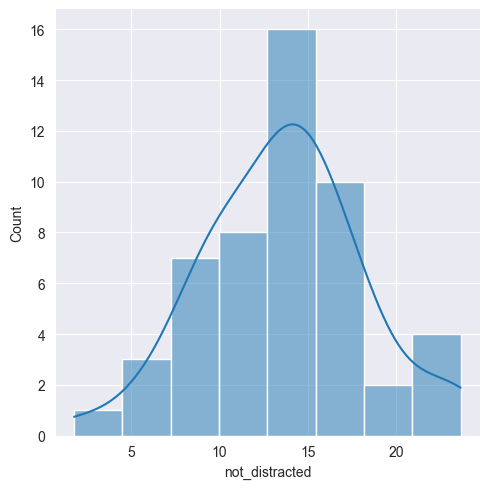

In [26]:
sns.displot(dfCars['not_distracted'], kde=True)

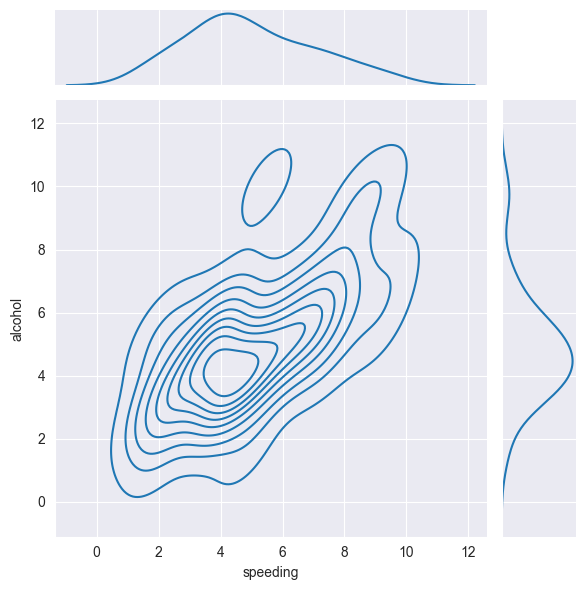

In [28]:
sns.jointplot(x='speeding', y='alcohol', data=dfCars, kind='kde')

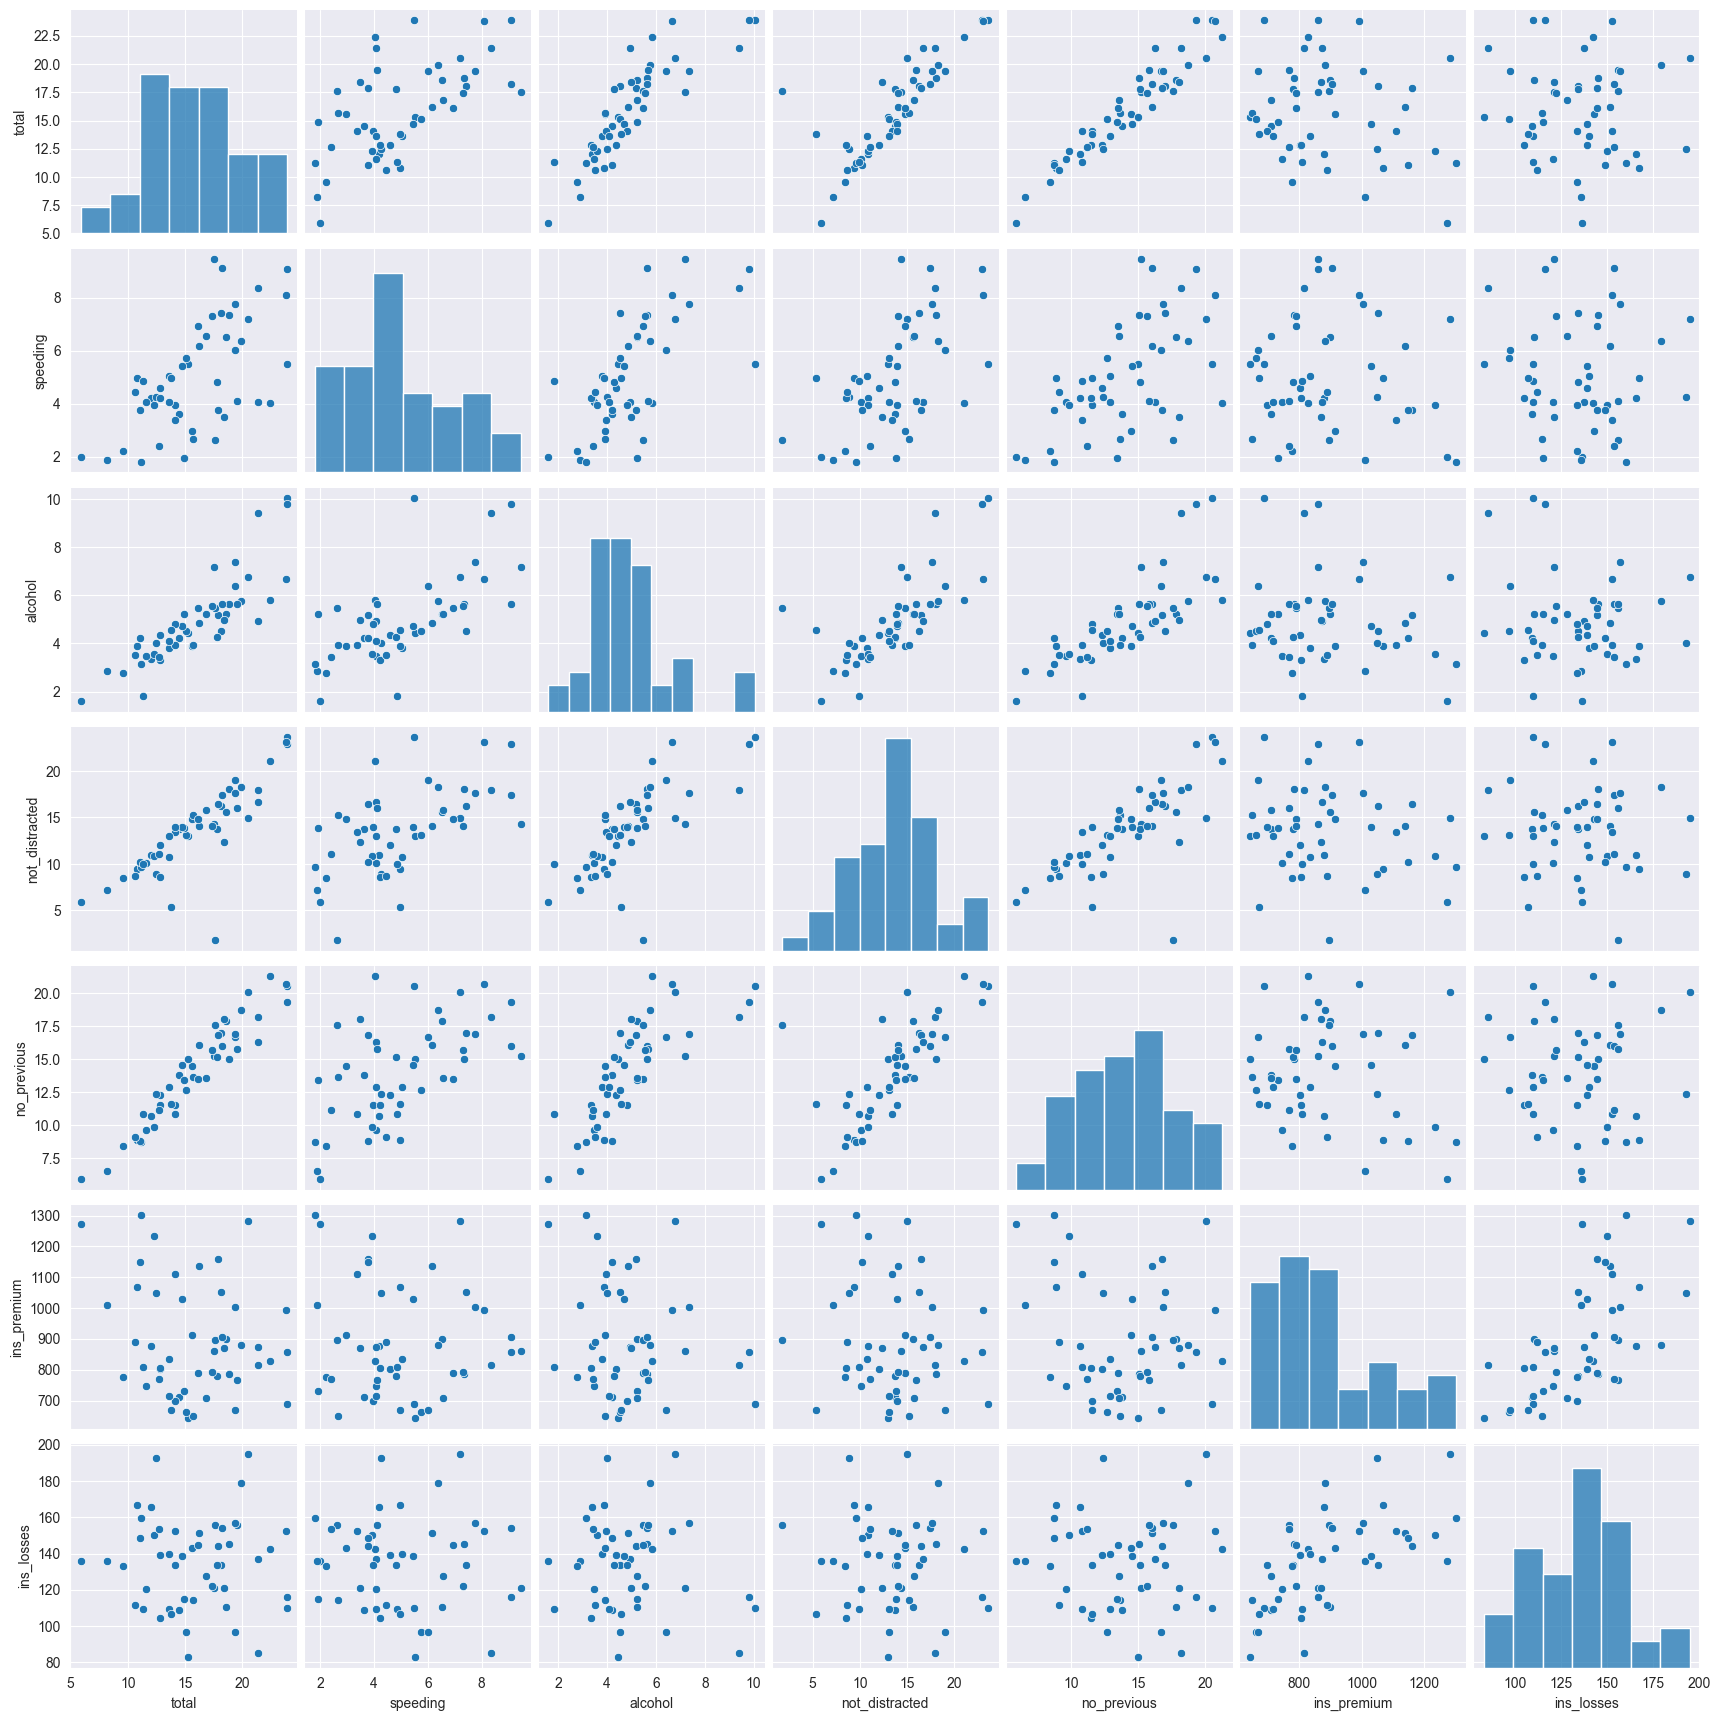

In [29]:
sns.pairplot(dfCars)

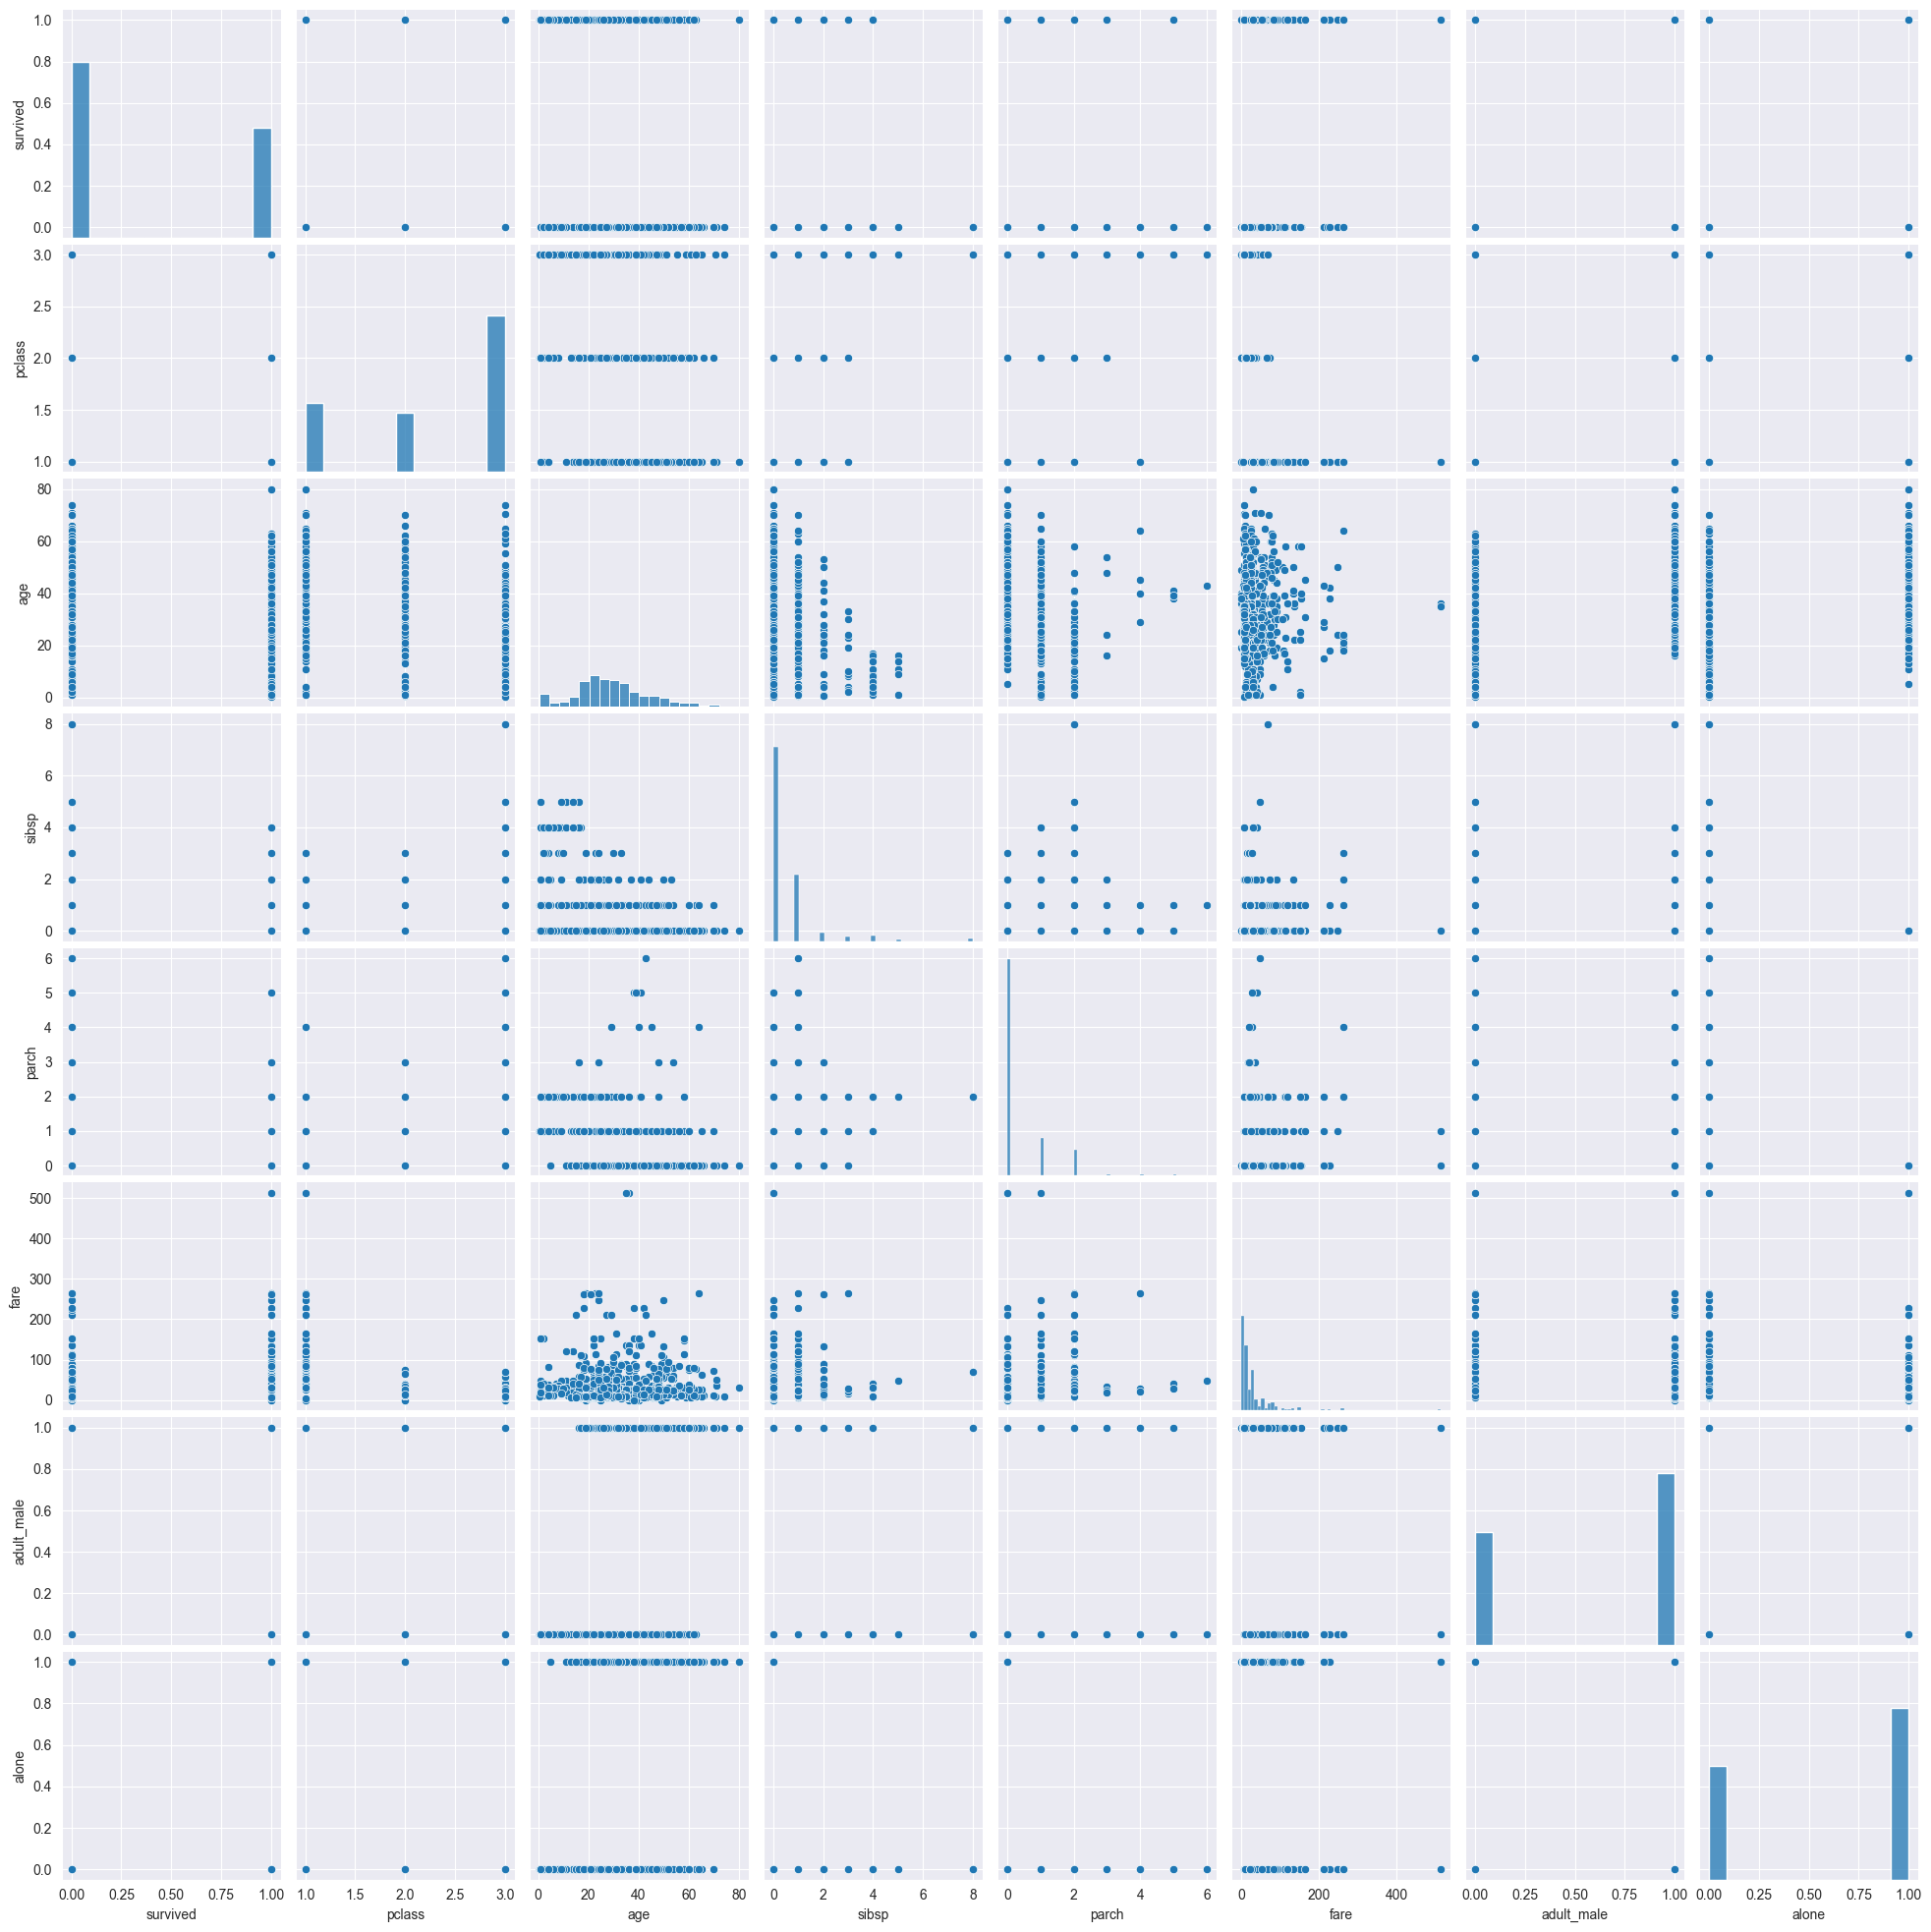

In [30]:
dfTitanic = sns.load_dataset('titanic')   # load the 'titanic' dataset

sns.pairplot(dfTitanic)

In [31]:
brain = sns.load_dataset('brain_networks')

brain.head()

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418


In [32]:
dfPenguins = sns.load_dataset('penguins')
dfPenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
